In [1]:
import tensorflow as tf

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

2025-03-25 08:50:25.861360: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-25 08:50:25.869883: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742871925.880037   20925 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742871925.882852   20925 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-25 08:50:25.894296: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

## CNN in MNIST Data

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

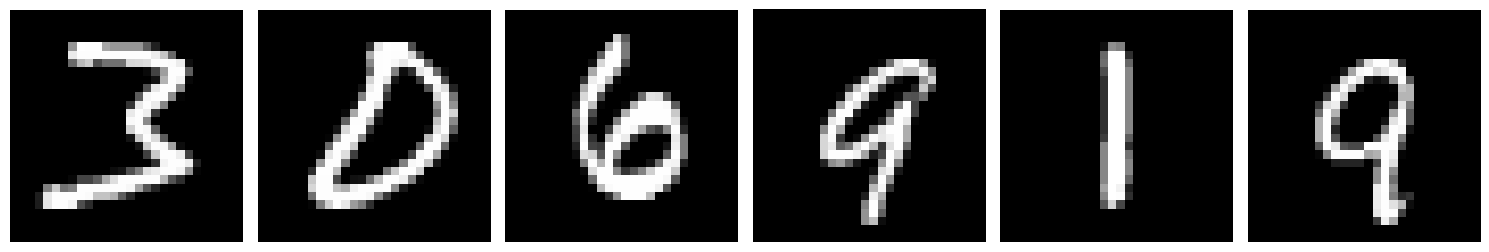

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Select 6 images (you can choose specific indices if needed)
indices = np.random.choice(len(X_train), 6, replace=False)
selected_images = [X_train[i] for i in indices]

# Create subplots
fig, axes = plt.subplots(1, 6, figsize=(15, 5))

# Plot each image
for ax, img in zip(axes, selected_images):
    ax.imshow(img, cmap='gray')  # Display image in grayscale
    ax.axis('off')  # Turn off axes for a cleaner look

# Display the plot
plt.tight_layout()
plt.show()

In [6]:
# Data Preprocessing
X_train = X_train.reshape(*X_train.shape, 1)
X_test = X_test.reshape(*X_test.shape, 1)

# Scaling Image Date
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

## Model Defination

In [7]:
input_shape = X_train.shape[1:]
num_classes = len(np.unique(y_train))

model = Sequential([
    Input(shape=input_shape),
    
    Conv2D(filters = 6, kernel_size=(5,5), strides=(1,1), padding="valid", activation='relu'),
    MaxPooling2D((2,2), strides = 2),

    Conv2D(filters = 16, kernel_size=(5,5), strides=(1,1), padding="valid", activation='relu'),
    MaxPooling2D((2,2), strides = 2),

    Flatten(),
    Dense(120, activation= 'relu'),
    Dropout(0.25),
    Dense(100, activation= 'relu'),
    Dense(num_classes, activation= 'softmax'),
])

model.summary()

I0000 00:00:1742871927.645561   20925 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4233 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 16)       │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        30,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        12,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,522 (181.73 KB)

 Trainable params: 46,522 (181.73 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
from tensorflow.keras.optimizers import Adam
adam = Adam(learning_rate=0.001)

model.compile(
    optimizer=adam,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [9]:
history = model.fit(
    X_train, y_train, epochs=25, batch_size=64, verbose=1, validation_split=0.2
)

Epoch 1/25


I0000 00:00:1742871928.844477   21028 service.cc:148] XLA service 0x7cb574018790 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1742871928.844496   21028 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2025-03-25 08:50:28.862546: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1742871928.949782   21028 cuda_dnn.cc:529] Loaded cuDNN version 90300


198/750 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - accuracy: 0.5824 - loss: 1.2842

I0000 00:00:1742871930.384305   21028 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7776 - loss: 0.6953 - val_accuracy: 0.9712 - val_loss: 0.0959
Epoch 2/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 984us/step - accuracy: 0.9629 - loss: 0.1185 - val_accuracy: 0.9752 - val_loss: 0.0768
Epoch 3/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 984us/step - accuracy: 0.9741 - loss: 0.0864 - val_accuracy: 0.9807 - val_loss: 0.0658
Epoch 4/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9792 - loss: 0.0684 - val_accuracy: 0.9834 - val_loss: 0.0582
Epoch 5/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 975us/step - accuracy: 0.9830 - loss: 0.0541 - val_accuracy: 0.9839 - val_loss: 0.0551
Epoch 6/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9852 - loss: 0.0457 - val_accuracy: 0.9859 - val_loss: 0.0499
Epoch 7/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 981us/step - accuracy: 0.9860 - loss: 0.0450 - val_accuracy: 0.9859 - val_loss: 0.0525
Epoch 8/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9881 - loss: 0.0374 - val_accuracy: 0.983

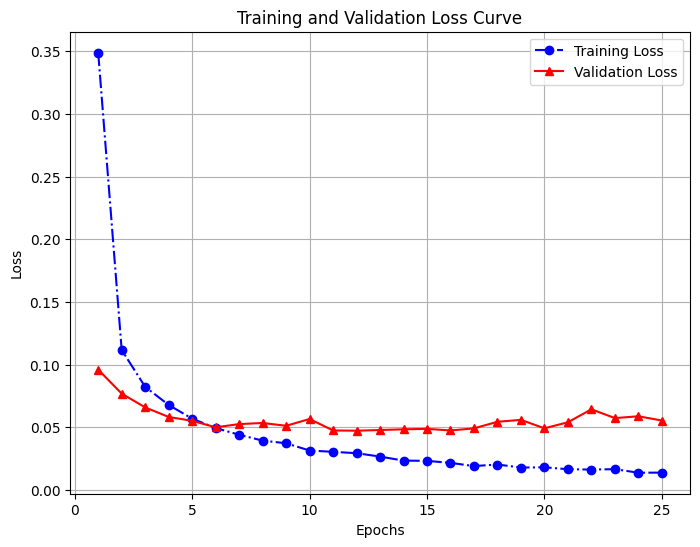

In [14]:
import matplotlib.pyplot as plt

# Example loss values (Replace these with actual values from your model)
epochs = range(1, 26)  # 25 epochs
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot loss curves
plt.figure(figsize=(8, 6))
plt.plot(epochs, loss, 'bo-.', label='Training Loss')  # 'bo-' means blue circles with a solid line
plt.plot(epochs, val_loss, 'r^-', label='Validation Loss')  # 'r^-' means red triangles with a solid line

# Labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curve')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [15]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step - accuracy: 0.9872 - loss: 0.0542


[0.042861949652433395, 0.9897000193595886]

In [16]:
pred = np.argmax(model.predict(X_test), axis =1 )

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step


In [17]:
pred

array([7, 2, 1, ..., 4, 5, 6])